In [7]:
import os
import csv

def list_files_to_csv(folder_path, output_csv):
    """
    Reads file names from a given folder and stores them in a CSV file.
    :param folder_path: Path to the folder containing the files.
    :param output_csv: Path to the output CSV file.
    """
    try:
        # Get list of files in the folder
        files = os.listdir(folder_path)
        
        # Filter only files, ignoring directories
        files = [f for f in files if os.path.isfile(os.path.join(folder_path, f))]
        
        # Write to CSV
        with open(output_csv, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["File Name"])  # Writing the header
            for file_name in files:
                writer.writerow([file_name])
        
        print(f"Successfully written {len(files)} file names to {output_csv}")
    except Exception as e:
        print(f"Error: {e}")

# Example usage
folder_path = "/media/cy0/b20cbdca-5a92-4cc0-a21d-48d30839b238/image_stack/"  # Change this to your folder path
output_csv = "output.csv"  # Output CSV file 
list_files_to_csv(folder_path, output_csv)

Successfully written 26522 file names to output.csv


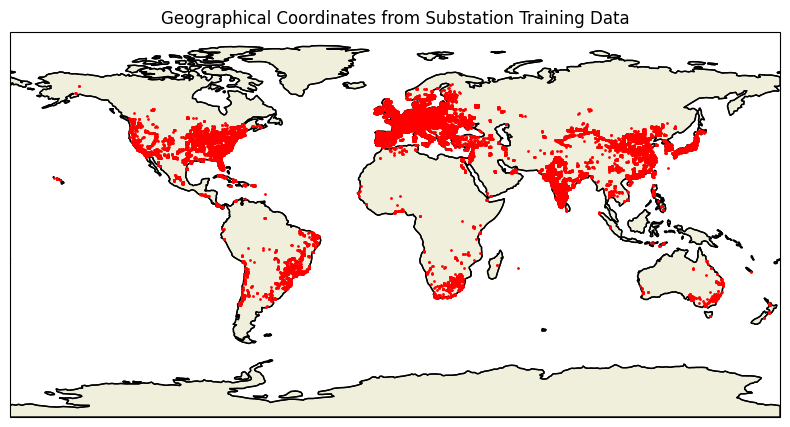

In [11]:
import os
import re
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def extract_coordinates(folder_path):
    """
    Extracts latitude and longitude from filenames in the specified folder.
    :param folder_path: Path to the folder containing the files.
    :return: List of (latitude, longitude) tuples.
    """
    coordinates = []
    pattern = re.compile(r'lat_([-\d\.]+)_lon_([-\d\.]+)')
    
    try:
        files = os.listdir(folder_path)
        
        for file_name in files:
            match = pattern.search(file_name)
            if match:
                lat, lon = match.groups()
                lat = float(lat.rstrip('.'))  # Remove trailing periods
                lon = float(lon.rstrip('.'))  # Remove trailing periods
                coordinates.append((lat, lon))
        
    except Exception as e:
        print(f"Error: {e}")
    
    return coordinates

def plot_coordinates(coordinates):
    """
    Plots extracted coordinates on a global map.
    :param coordinates: List of (latitude, longitude) tuples.
    """
    plt.figure(figsize=(10, 5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_global()
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    
    # Plot points
    for lat, lon in coordinates:
        plt.plot(lon, lat, marker='o', color='red', markersize=1, transform=ccrs.PlateCarree())
    
    plt.title("Geographical Coordinates from Substation Training Data")
    plt.show()

# Example usage
#folder_path = "your_folder_path_here"  # Change this to your folder path
coordinates = extract_coordinates(folder_path)
if coordinates:
    plot_coordinates(coordinates)
else:
    print("No valid coordinates found.")

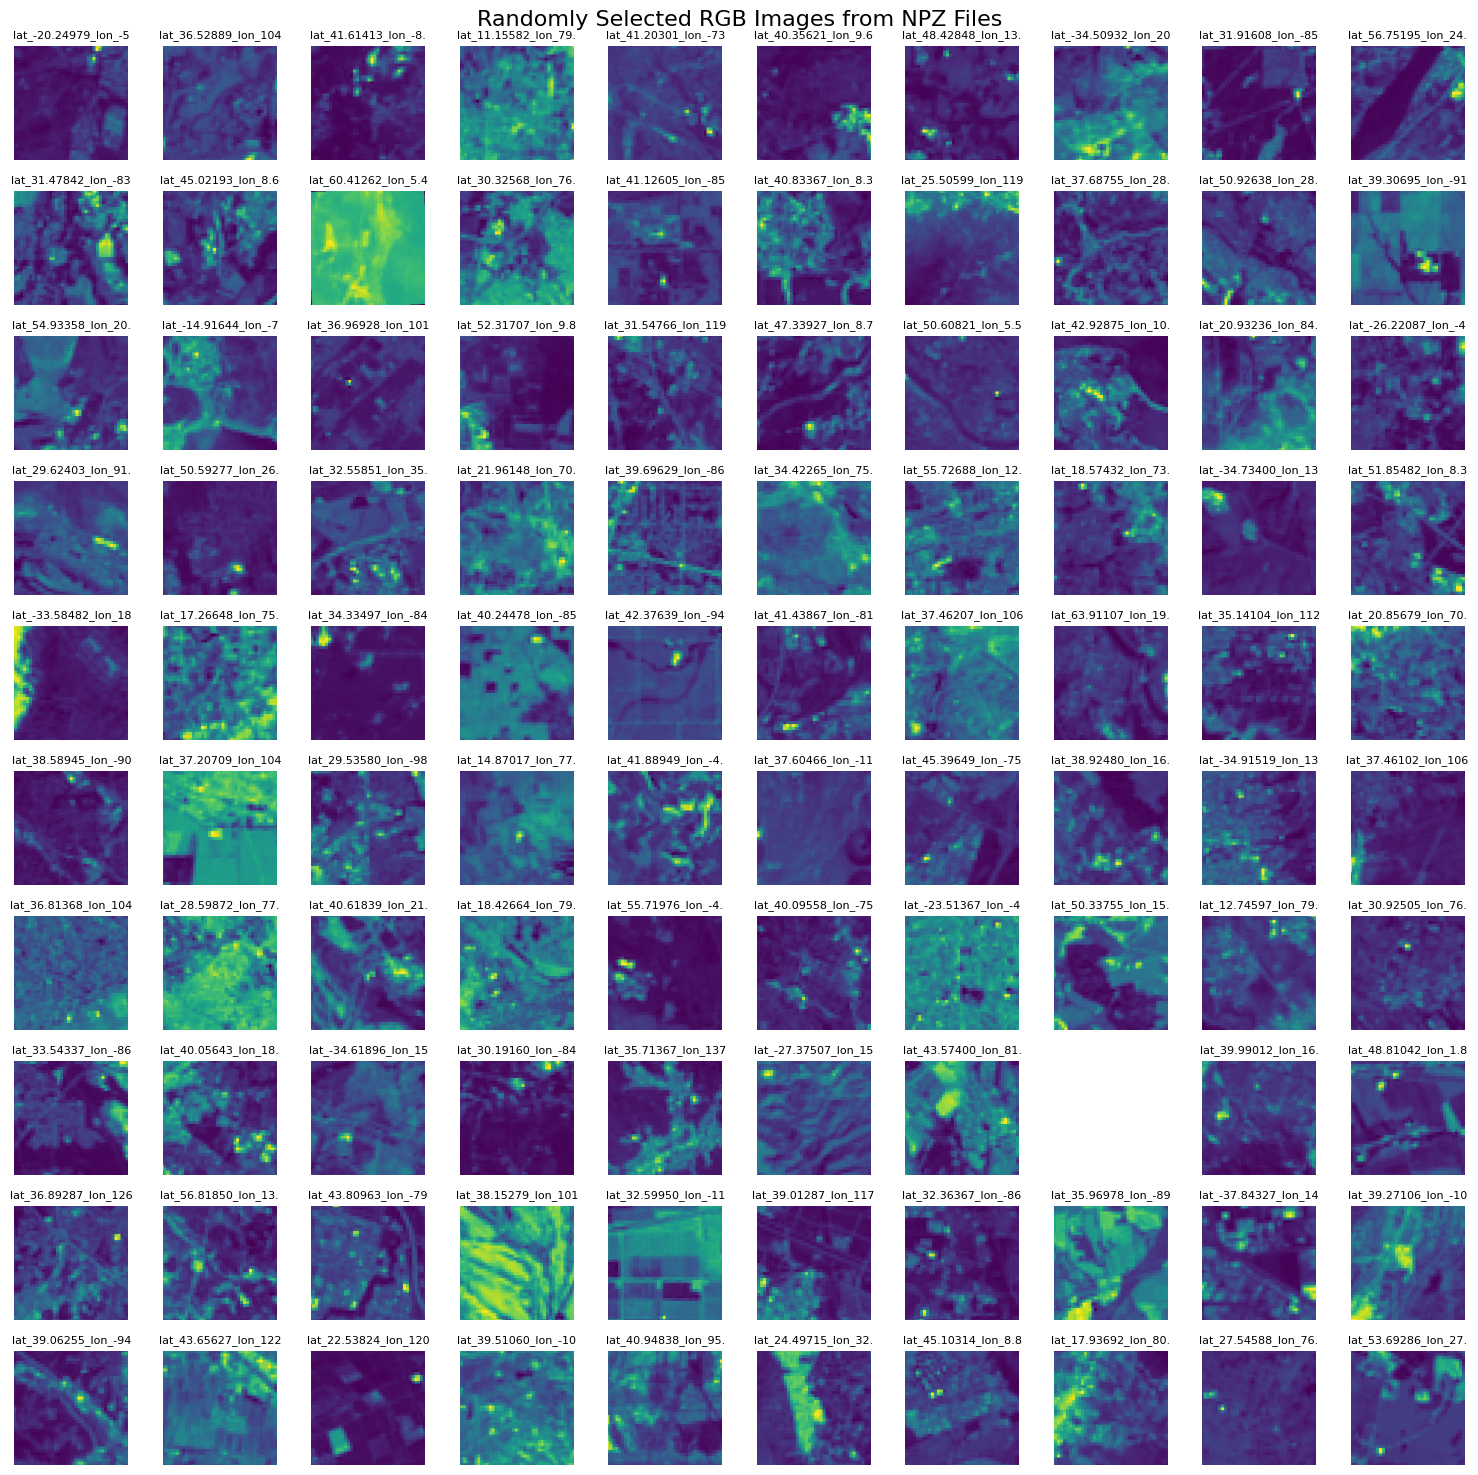

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

def load_npz_file(file_path):
    """Loads an NPZ file and extracts the first 3 bands (RGB)."""
    try:
        data = np.load(file_path)
        if 'arr_0' in data:
            image_data = data['arr_0']
            if image_data.shape[0] >= 3:
                rgb_image = image_data[:3]  # Extract first 3 bands
                # Normalize to [0, 1] for visualization
                #rgb_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())
                return image_data[0][0]
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
    return None

def plot_random_images(folder_path, num_images=100):
    """Randomly selects NPZ files and plots their RGB images."""
    files = [f for f in os.listdir(folder_path) if f.endswith('.npz')]
    if len(files) == 0:
        print("No NPZ files found in the folder.")
        return
    
    selected_files = random.sample(files, min(num_images, len(files)))
    
    grid_size = int(np.ceil(np.sqrt(len(selected_files))))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
    axes = axes.flatten()
    
    for ax, file_name in zip(axes, selected_files):
        file_path = os.path.join(folder_path, file_name)
        img = load_npz_file(file_path)
        if img is not None:
            ax.imshow(img)
            ax.set_title(file_name[:20], fontsize=8)  # Show truncated filename
        ax.axis("off")
    
    plt.suptitle("Randomly Selected RGB Images from NPZ Files", fontsize=16)
    plt.tight_layout()
    plt.show()

# Example usage
plot_random_images(folder_path)